# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  Bharat Santosh Shewale


# **Project Summary -**

The coronavirus disease 2019 (COVID-19) pandemic has influenced the everyday life of people around the globe. In general and during lockdown phases, people worldwide use social media network to state their viewpoints and general feelings concerning the pandemic that has hampered their daily lives. Twitter is one of the most commonly used social media platforms, and it showed a massive increase in tweets related to coronavirus, including positive, negative, and neutral tweets, in a minimal period. The researchers move toward the sentiment analysis and analyze the various emotions of the public toward COVID-19 due to the diverse nature of tweets.
Meanwhile, people have expressed their feelings regarding the vaccinations' safety and effectiveness on social networking sites such as Twitter. As an advanced step, in this paper, our proposed approach analyzes COVID-19 by focusing on Twitter users who share their opinions on this social media networking site. The proposed approach analyzes collected tweets' sentiments for sentiment classification using various feature sets and classifiers. The early detection of COVID-19 sentiments from collected tweets allow for a better understanding and handling of the pandemic. Tweets are categorized into positive, negative, and neutral sentiment classes.

# **GitHub Link -**

https://github.com/bsshewale/Coronavirus-tweet-sentiment-analysis

# **Problem Statement**


### *Challenge asks to build a classification model to predict the sentiment of COVID-19 tweets*

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image


In [ ]:
#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
#Assigning variable
df_orignal=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/Project 4 /Coronavirus Tweets.csv', encoding='latin-1')

### Dataset First View

In [ ]:
# Dataset First Look
df=df_orignal.copy()
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape


(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


* UserName and ScreenName are integer identifiers for users.

* Location has ~21% missing data (32,567 non-null out of 41,157). This can impact any geographical sentiment analysis.

* TweetAt provides the date of the tweet, useful for time series trend analysis.

* OriginalTweet is the raw textual content used for Natural Language Processing (NLP).

* Sentiment contains labeled emotions such as Positive, Negative, Neutral, etc., which serves as the target variable for modeling.




#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
len(df.isnull())

41157

<Axes: xlabel='UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment'>

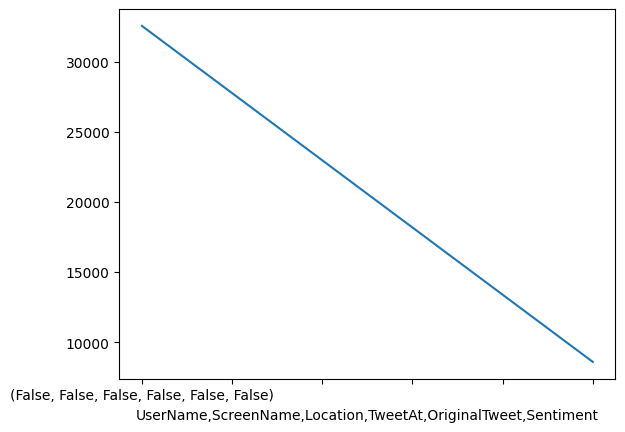

In [ ]:
# Visualizing the missing values
df.isna().value_counts().plot()

### What did you know about your dataset?

* Dataset is having 6 columns and 41157 rows
* Also there are some na values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
#checking Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,41157.0,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0


### Variables Description

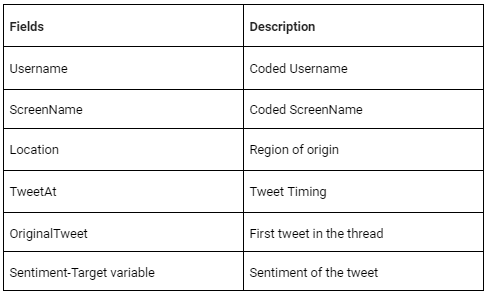

### Check Unique Values for each variable.

In [ ]:
#checking Unique values
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

## **Convert to LowerCase :**

In [ ]:
# Write your code to make your dataset analysis ready.
df["OriginalTweet"] = df["OriginalTweet"].str.lower()
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

## **Removing Punctuations :**

In [ ]:
# Removing www from string
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
# Removing punctuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)

In [ ]:
df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [ ]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


In [ ]:
# Clean tweet look
df['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

## **Removing Stop Words :**

In [ ]:
# Importing Stop-words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
# function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [ ]:
# Applying lambda fuction
df['clean_tweets']= df['clean_tweets'].apply(lambda x: remove_stopwords(x))
df.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

## **Stemming**

In [ ]:
# Importing library
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
# function for stemming
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
df['stemmed'] = df['clean_tweets'].apply(lambda x: stemming(x))
# result
df.stemmed.head()

0                           menyrbi philgahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas dont panic enough f...
4    readi go supermarket covid outbreak im paranoi...
Name: stemmed, dtype: object

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

## **Lemmatizing**

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_tweets,stemmed,lemmed
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,"[menyrbie, philgahan, chrisitv]"
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,"[advice, talk, neighbour, family, exchange, ph..."
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,"[coronavirus, australia, woolworth, give, elde..."
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,"[food, stock, one, empty, please, dont, panic,..."
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,"[ready, go, supermarket, covid, outbreak, im, ..."


Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **Tweet Count For Each Sentiment**

In [ ]:
#Getting the unique values count
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


* Dominant Sentiment:
The most common sentiment is Positive, followed by Negative.

* Emotion Polarity:
Tweets with positive emotions (including extremely positive) are slightly higher than negative emotions overall.

* Neutral Tweets:
A significant portion of tweets are neutral, indicating that many users are sharing information or updates without showing strong emotions.

#### Chart - 1
Proportion of sentiments

Text(0, 0.5, 'count')

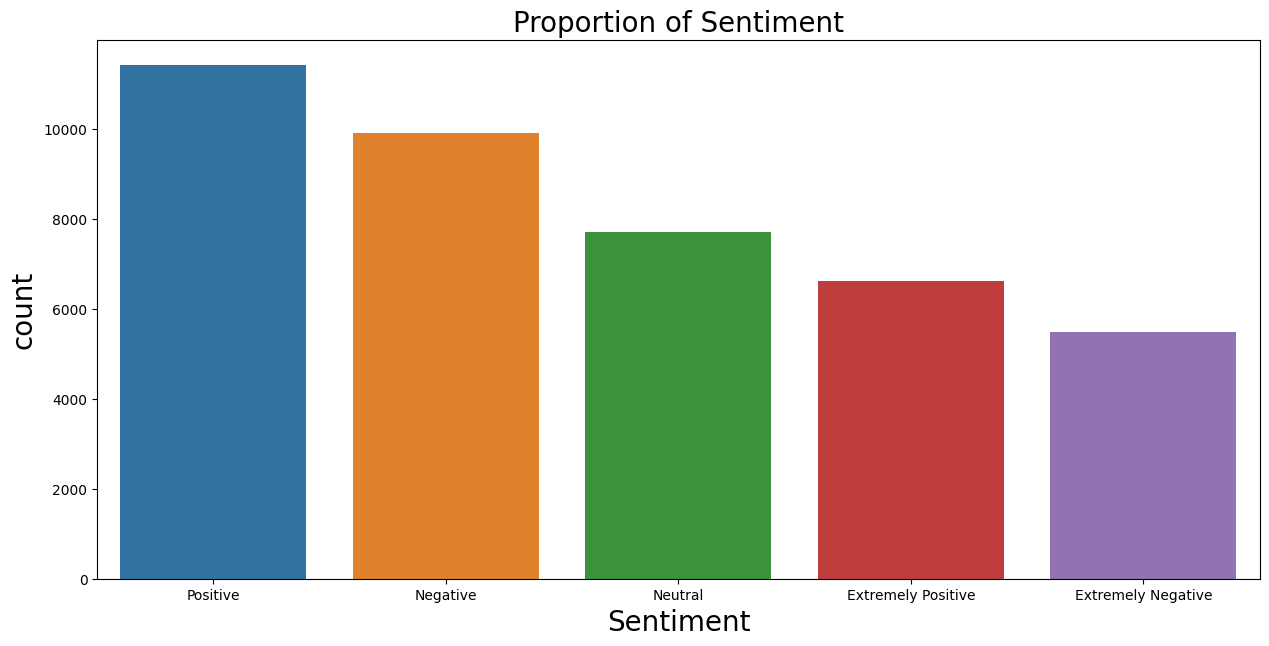

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

##### What is/are the insight(s) found from the chart?

* Number of "Positive" sentiments are higher than all other sentiments.
* Dataset have significant amount of negative sentiments.





In [ ]:
# Replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


#### Chart - 2
Piechart of sentiments

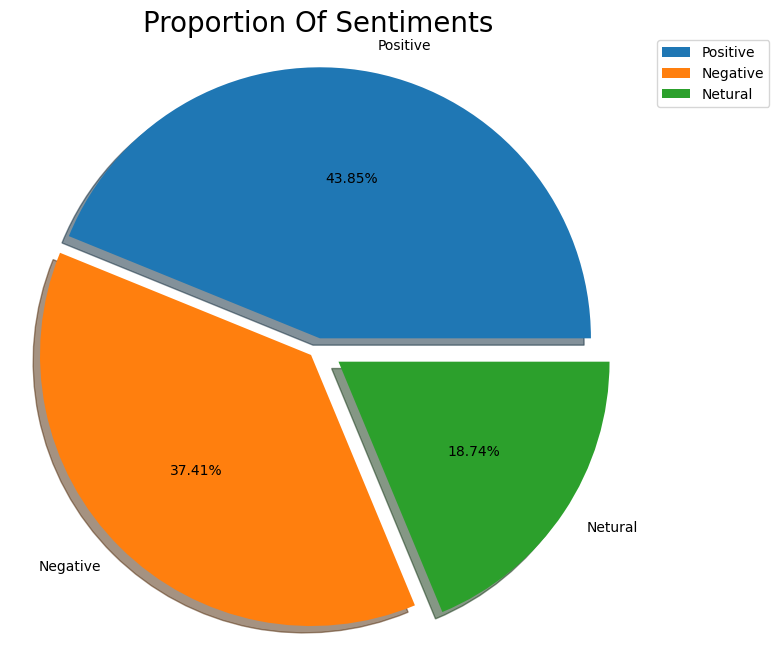

In [ ]:
# Chart - 2 visualization code
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


##### What is/are the insight(s) found from the chart?

We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively. As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.

#### Chart - 3
Count of the words

In [ ]:
# Chart - 3 visualization code
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())
from collections import Counter
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'covid',",18286
1,"'coronavirus',",12991
2,"'prices',",7406
3,"'store',",6626
4,"'food',",6612
5,"'supermarket',",6410
6,"'grocery',",5790
7,"'people',",5067
8,"'amp',",4912
9,"'consumer',",4085


##### What is/are the insight(s) found from the chart?

Most Frequently Used Terms:

The words "covid" (18,286 times) and "coronavirus" (12,991 times) dominate the conversation, showing high engagement around the pandemic topic.

Focus on Daily Essentials:

Words like "prices" (7,406), "store" (6,626), "food" (6,612), "supermarket" (6,410), and "grocery" (5,790) highlight strong public concern about essential supplies and access during the pandemic.

Consumer & Behavioral Impact:

Terms like "consumer", "shopping", and "online" suggest that many tweets discuss buying behavior, possibly reflecting shifts to online purchases or price concerns.

Social Themes:

Words like "people", "workers", and "need" indicate conversations about community, essential workers, and public needs during this period.

Emotional Indicators:

The presence of words like "pandemic", "get", "like", and "us" suggests people are sharing personal experiences, opinions, or calls for support.

#### Chart - 4
Wordcloud separating the different sentiments

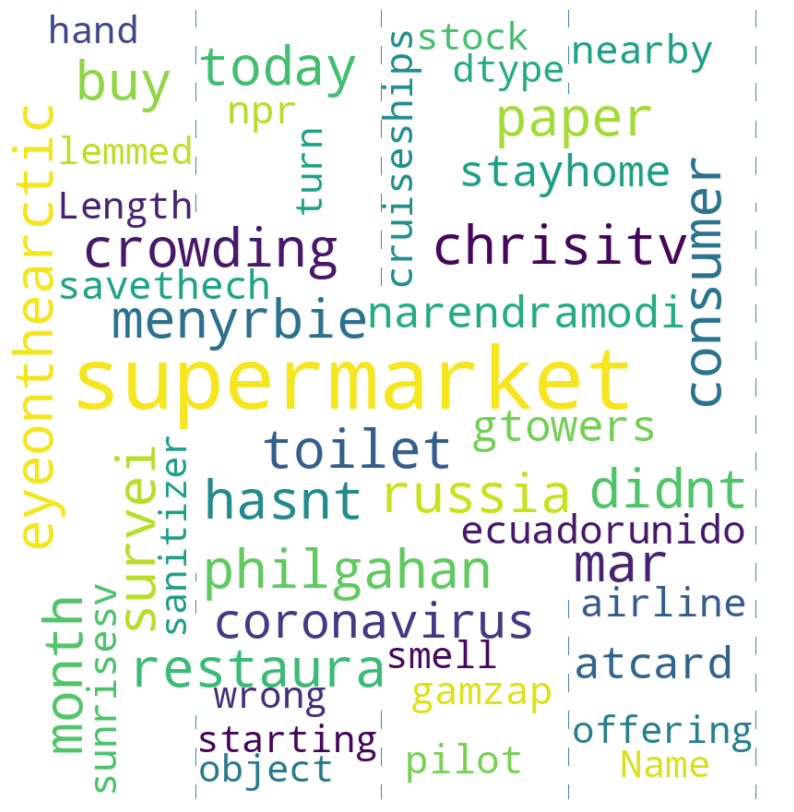

In [ ]:
# Chart - 4 visualization code
#seperating the sentiments for word cloud
neutral = pd.DataFrame(df[['stemmed','lemmed']] [df['Sentiment'] == 'Neutral'])
positive = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Positive'])
negative = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Negative'])
mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Assignments/Project 4 /twitter-logo-11549680523gyu1fhgduu.png"))
wc = WordCloud(background_color='white',mask = mask,contour_width=1,contour_color='steelblue')
wc.generate(str(neutral['lemmed']))
plt.figure(figsize=(10,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

#####  What is/are the insight(s) found from the chart?

* This figure shows neutral sentiments words.

#### Chart - 5
Wordcloud for positive sentiments

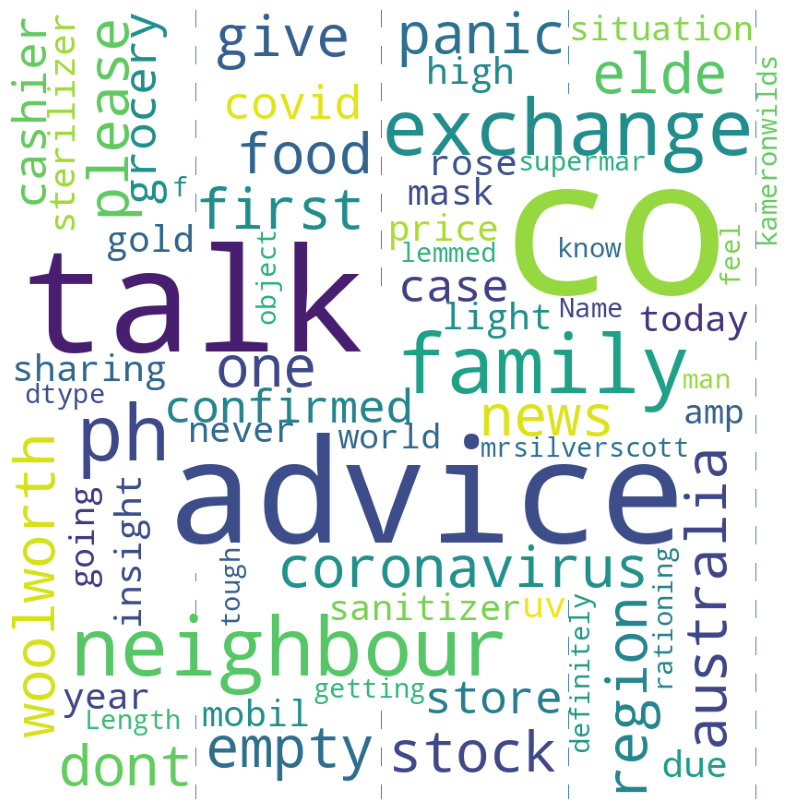

In [ ]:
# Chart - 5 visualization code
# Generating word cloud for positive sentiments
wc.generate(str(positive['lemmed']))
plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

 #####  What is/are the insight(s) found from the chart?

This chart gives the words of positivity.

#### Chart - 6
Wordcloud for negative sentiments

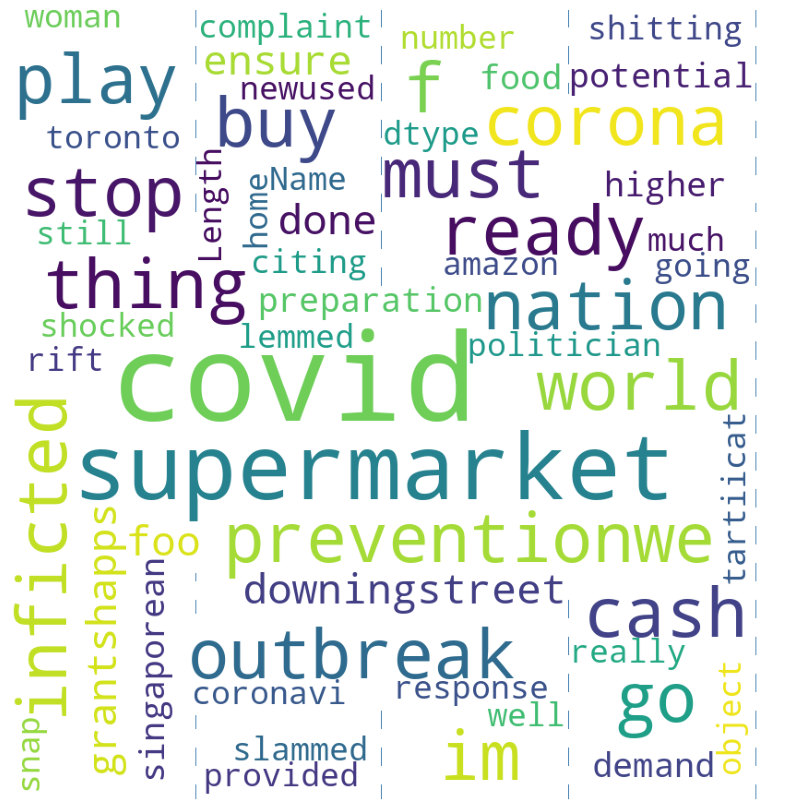

In [ ]:
# Chart - 6 visualization code
# Generating word cloud for negative sentiments
wc.generate(str(negative['lemmed']))
plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

This figures out negative words.

## **Train-Test Split**

In [ ]:
# Assigning dependent and independent features
X= df['lemmed']
y=df['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

# checking shape of splitted data
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [ ]:
# checking splitted data
print(X_train.head())
y_train.head()

23805    [target, pull, back, store, remodels, opening,...
31828    [breaking, msf, call, patent, profiteering, dr...
24504    [coronavirus, spread, world, leader, get, toug...
17281    [store, shelf, empty, people, selling, certain...
11488    [fresco, u, normal, night, final, reduction, n...
Name: lemmed, dtype: object


23805     Neutral
31828    Negative
24504    Negative
17281    Positive
11488     Neutral
Name: Sentiment, dtype: object

## **Count Vectorization (Bag of words) and TF/IDF Vecorization**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())

In [ ]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [ ]:
tv_X_train.shape

(28809, 17189)

In [ ]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

## **Implementing Models (Bag of Words) by Count Vectoriser**

### **Logistic Regression Count Vectoriser Method with Gridsearch CV**

In [ ]:
#Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(cv_X_test)
pred_lr_cv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [ ]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7828798185941043


In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.79      0.79      4620
     Neutral       0.68      0.68      0.68      2314
    Positive       0.82      0.83      0.82      5414

    accuracy                           0.78     12348
   macro avg       0.76      0.76      0.76     12348
weighted avg       0.78      0.78      0.78     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

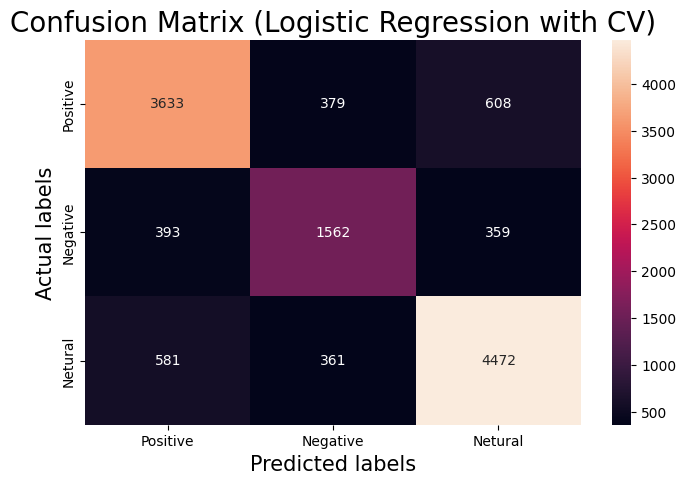

In [ ]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* This model gives an accuracy score of 78.28% which implies that our model is performing well.

* The model performs best on Positive sentiments with an F1-score of 0.82, indicating strong ability to identify encouraging and hopeful tweets during the pandemic.

* It also maintains consistent performance on Negative sentiments with an F1-score of 0.79, helping detect critical or alarming views.

* Neutral sentiments have slightly lower scores (F1-score: 0.68), suggesting a potential area for improvement — possibly due to ambiguous language in neutral tweets.

* The balanced performance across categories makes the model suitable for general public sentiment analysis.



### **Decision Tree Classifier with CV**

In [ ]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)
pred_dt_cv

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.6904436653819104


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.69      0.68      0.69      4620
     Neutral       0.62      0.66      0.64      2314
    Positive       0.75      0.74      0.75      5414

    accuracy                           0.70     12348
   macro avg       0.69      0.69      0.69     12348
weighted avg       0.70      0.70      0.70     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

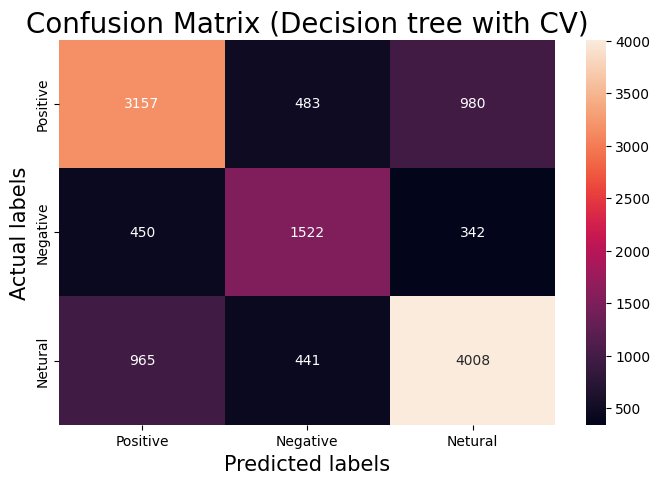

In [ ]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* This model gives an accuracy score of 69.04% which implies that our model is performing well.

* The model performs best on Positive tweets, with an F1-score of 0.75, capturing supportive or optimistic opinions during the COVID-19 pandemic.

* Negative tweets are also reasonably well captured (F1-score: 0.69), enabling good detection of concern, criticism, or anxiety.

* Neutral tweets show slightly lower performance (F1-score: 0.64), which might be due to the subtle and context-dependent nature of neutral language.

* The overall accuracy of 70% suggests that the model is performing moderately well for real-world social media sentiment tasks.

### **K-NN Count Vectorizer with GridsearchCV**

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_cv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_cv.fit(cv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
#predicted values
pred_knn_cv = knn_cv.predict(cv_X_test)
pred_knn_cv

array(['Positive', 'Neutral', 'Neutral', ..., 'Negative', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.4103498542274053


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))


              precision    recall  f1-score   support

    Negative       0.55      0.40      0.46      4620
     Neutral       0.25      0.72      0.37      2314
    Positive       0.69      0.29      0.41      5414

    accuracy                           0.41     12348
   macro avg       0.50      0.47      0.41     12348
weighted avg       0.55      0.41      0.42     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

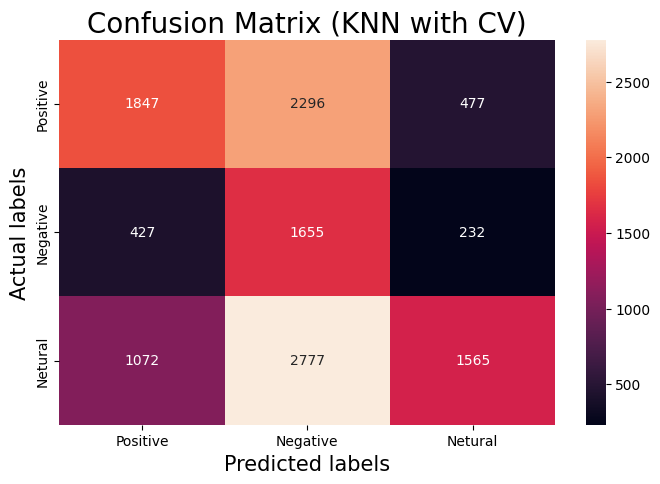

In [ ]:
#Plotting Confussion matrix
cf4= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* The model is giving an accuracy score of 41% which implies that our model is underperforming.

* The model's overall accuracy has dropped to 41%, indicating limited effectiveness in real-world prediction tasks.

* Neutral sentiment has the highest recall (72%) but very low precision (25%), suggesting the model often mislabels other sentiments as neutral.

* Positive tweets have decent precision (69%) but very poor recall (29%), meaning many actual positive tweets go undetected.

* Negative sentiment has a somewhat balanced but moderate performance (F1-score: 0.46).

* These results indicate class imbalance and possibly misleading signals during training or inadequate feature representation.

## **Implementing Models by TF/IDF Vectorizer**

### **Logistic Regression TF/IDF vectorizer with GridsearchCV**

In [ ]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

# Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

# Fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)
pred_lr_tv_Gcv

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [ ]:
# Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.7738095238095238


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

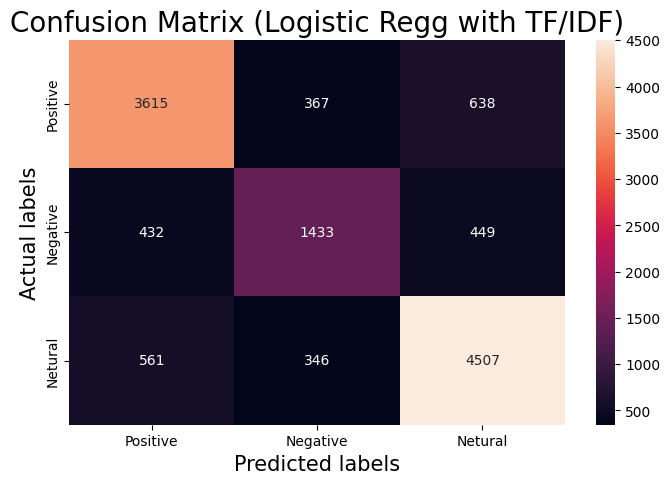

In [ ]:
# Plotting Confussion matrix
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* This model gives an accuracy score of 77% which implies that our model is performing well.

### **Decision tree classifier with TF/IDF**

In [ ]:
# Initializing model
dt_tv=DecisionTreeClassifier()

# Fitting the data to model
dt_tv.fit(tv_X_train,y_train)

# Prediction
pred_dt_tv=dt_tv.predict(tv_X_test)
pred_dt_tv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [ ]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6025202680340902


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

              precision    recall  f1-score   support

    Negative       0.62      0.60      0.61      4620
     Neutral       0.48      0.55      0.51      2314
    Positive       0.68      0.66      0.67      5414

    accuracy                           0.62     12348
   macro avg       0.59      0.60      0.60     12348
weighted avg       0.62      0.62      0.62     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

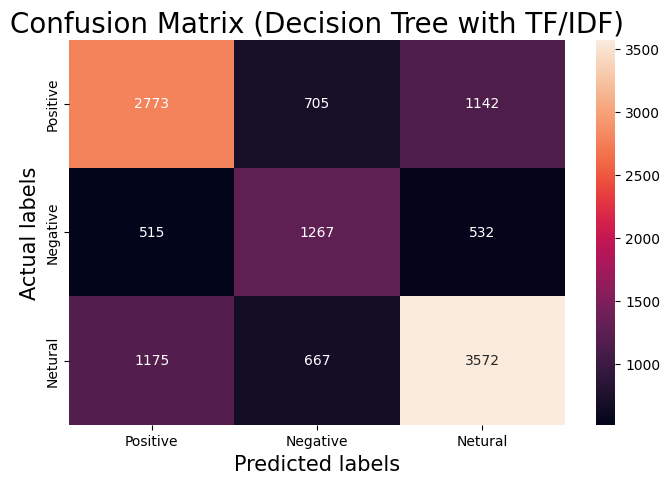

In [ ]:
# Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

* This model gives an accuracy score of 60% which implies that our model is performing well.

* Performance has improved compared to earlier models (previous F1: 41% → current F1: 62%).

* Positive sentiment classification shows the strongest performance across all metrics (F1: 0.67).

* Neutral sentiment remains the weakest, especially in precision (0.48), which suggests the model still misclassifies other classes as Neutral.

*  Negative sentiment shows balanced precision and recall with an F1-score of 0.61, indicating decent performance.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We applied five different machine learning models to classify sentiment in the dataset. Among them:

* Logistic Regression with CountVectorizer performed the best, with an accuracy of 78% and a weighted F1-score of 0.78.

* Decision Tree with CountVectorizer showed decent performance with 70% accuracy and a weighted F1-score of 0.70. It is a simple and interpretable model.

* K-Nearest Neighbors (KNN) with CountVectorizer performed poorly with only 41% accuracy and was not suitable for high-dimensional data.

* Logistic Regression with TF-IDF achieved 62% accuracy and a weighted F1-score of 0.62, but performed worse than with CountVectorizer.

* Decision Tree with TF-IDF also reached 62% accuracy and a weighted F1-score of 0.62, making it stable but not the top performer.

Overall, Logistic Regression using CountVectorizer is the best choice for this sentiment classification task.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***